# Loan Data Model Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

## Modelling With Imbalance target class

#### Feature Engineering Non Numeric Features

In [5]:
target = df['not.fully.paid']
features = df.drop('not.fully.paid',axis=1)

In [12]:
features['purpose'] = features['purpose'].astype('category')

In [15]:
features['purpose'].cat.categories = list(range(0,7))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

In [22]:
def class_report_by_algo(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    clf = model()
    clf.fit(X_train,y_train)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_train)
    print('Class Report Data Test')
    print(classification_report(y_test,prediction_test))
    print('====================')
    print('Class Report Data Train')
    print(classification_report(y_train,prediction_train))

In [23]:
class_report_by_algo(features,target,LogisticRegression)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2036
           1       0.62      0.02      0.04       359

   micro avg       0.85      0.85      0.85      2395
   macro avg       0.73      0.51      0.48      2395
weighted avg       0.82      0.85      0.79      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6009
           1       0.39      0.01      0.03      1174

   micro avg       0.84      0.84      0.84      7183
   macro avg       0.61      0.50      0.47      7183
weighted avg       0.76      0.84      0.77      7183



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
class_report_by_algo(features,target,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2043
           1       0.19      0.27      0.23       352

   micro avg       0.73      0.73      0.73      2395
   macro avg       0.53      0.54      0.53      2395
weighted avg       0.77      0.73      0.74      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6002
           1       1.00      1.00      1.00      1181

   micro avg       1.00      1.00      1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183



In [25]:
class_report_by_algo(features,target,RandomForestClassifier)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2023
           1       0.32      0.06      0.11       372

   micro avg       0.83      0.83      0.83      2395
   macro avg       0.59      0.52      0.51      2395
weighted avg       0.77      0.83      0.78      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6022
           1       1.00      0.86      0.92      1161

   micro avg       0.98      0.98      0.98      7183
   macro avg       0.99      0.93      0.96      7183
weighted avg       0.98      0.98      0.98      7183



In [26]:
class_report_by_algo(features,target,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2003
           1       0.42      0.03      0.05       392

   micro avg       0.83      0.83      0.83      2395
   macro avg       0.63      0.51      0.48      2395
weighted avg       0.77      0.83      0.77      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6042
           1       0.95      0.08      0.15      1141

   micro avg       0.85      0.85      0.85      7183
   macro avg       0.90      0.54      0.53      7183
weighted avg       0.87      0.85      0.80      7183



## Handling Imbalance Data

### Undersampling

In [27]:
a = list(range(1,100))

In [31]:
minority_data = df[df['not.fully.paid'] == 1]
mayority_data = df[df['not.fully.paid'] == 0]

In [33]:
len(minority_data)

1533

In [35]:
index_for_mayority = np.random.choice(mayority_data.index, len(minority_data))

In [45]:
df_class_0 = df.loc[index_for_mayority]

In [47]:
undersampling_df = pd.concat([df_class_0,minority_data])

In [49]:
undersampling_df['not.fully.paid'].value_counts(normalize=True)

1    0.5
0    0.5
Name: not.fully.paid, dtype: float64

### Modelling With Undersampling Data

#### Feature Engineering 

In [51]:
undersampling_df = pd.get_dummies(undersampling_df,columns=['purpose'],drop_first=True)

In [52]:
x_under, y_under = undersampling_df.drop('not.fully.paid',axis=1) , undersampling_df['not.fully.paid']

In [53]:
class_report_by_algo(x_under,y_under,LogisticRegression)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       387
           1       0.58      0.54      0.56       380

   micro avg       0.58      0.58      0.58       767
   macro avg       0.58      0.58      0.58       767
weighted avg       0.58      0.58      0.58       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1146
           1       0.62      0.58      0.60      1153

   micro avg       0.61      0.61      0.61      2299
   macro avg       0.61      0.61      0.61      2299
weighted avg       0.61      0.61      0.61      2299



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
class_report_by_algo(x_under,y_under,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.53      0.56      0.55       373
           1       0.56      0.53      0.55       394

   micro avg       0.55      0.55      0.55       767
   macro avg       0.55      0.55      0.55       767
weighted avg       0.55      0.55      0.55       767

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1160
           1       1.00      1.00      1.00      1139

   micro avg       1.00      1.00      1.00      2299
   macro avg       1.00      1.00      1.00      2299
weighted avg       1.00      1.00      1.00      2299



In [55]:
class_report_by_algo(x_under,y_under,RandomForestClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       402
           1       0.57      0.53      0.55       365

   micro avg       0.59      0.59      0.59       767
   macro avg       0.59      0.58      0.58       767
weighted avg       0.59      0.59      0.59       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1131
           1       0.99      0.98      0.99      1168

   micro avg       0.99      0.99      0.99      2299
   macro avg       0.99      0.99      0.99      2299
weighted avg       0.99      0.99      0.99      2299



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
class_report_by_algo(x_under,y_under,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       370
           1       0.65      0.62      0.63       397

   micro avg       0.63      0.63      0.63       767
   macro avg       0.63      0.63      0.63       767
weighted avg       0.63      0.63      0.63       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1163
           1       0.77      0.72      0.74      1136

   micro avg       0.75      0.75      0.75      2299
   macro avg       0.75      0.75      0.75      2299
weighted avg       0.75      0.75      0.75      2299



### Oversampling

#### Random Oversampling

In [57]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [58]:
ros = RandomOverSampler()

In [61]:
X_ros , y_ros = ros.fit_sample(features,target)

In [66]:
df_over_all = pd.DataFrame(X_ros,columns=features.columns)
df_over_all['not.fully.paid'] = y_ros

In [68]:
df_over_all['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

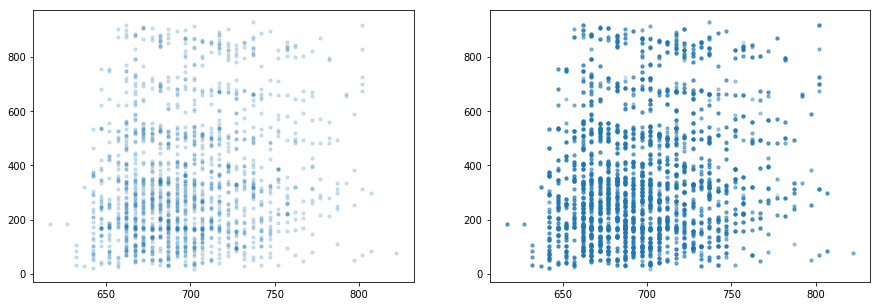

In [77]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].scatter(df[df['not.fully.paid'] == 1]['fico'] ,
              df[df['not.fully.paid'] == 1]['installment'] ,s=10 , alpha=0.2)
ax[1].scatter(df_over_all[df_over_all['not.fully.paid'] == 1]['fico'] ,
              df_over_all[df_over_all['not.fully.paid'] == 1]['installment'] ,s=10 , alpha=0.2)

In [78]:
class_report_by_algo(df_over_all.drop('not.fully.paid',axis=1) , df_over_all['not.fully.paid'] , LogisticRegression)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      2053
           1       0.61      0.57      0.59      1970

   micro avg       0.61      0.61      0.61      4023
   macro avg       0.61      0.61      0.61      4023
weighted avg       0.61      0.61      0.61      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      5992
           1       0.61      0.56      0.58      6075

   micro avg       0.60      0.60      0.60     12067
   macro avg       0.60      0.60      0.60     12067
weighted avg       0.60      0.60      0.60     12067



In [79]:
class_report_by_algo(df_over_all.drop('not.fully.paid',axis=1) , 
                     df_over_all['not.fully.paid'] , DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.99      0.80      0.89      2025
           1       0.83      0.99      0.91      1998

   micro avg       0.90      0.90      0.90      4023
   macro avg       0.91      0.90      0.90      4023
weighted avg       0.91      0.90      0.90      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6020
           1       1.00      1.00      1.00      6047

   micro avg       1.00      1.00      1.00     12067
   macro avg       1.00      1.00      1.00     12067
weighted avg       1.00      1.00      1.00     12067



In [80]:
class_report_by_algo(X_ros,y_ros,RandomForestClassifier)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2001
           1       0.95      0.99      0.97      2022

   micro avg       0.96      0.96      0.96      4023
   macro avg       0.97      0.96      0.96      4023
weighted avg       0.97      0.96      0.96      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6044
           1       1.00      1.00      1.00      6023

   micro avg       1.00      1.00      1.00     12067
   macro avg       1.00      1.00      1.00     12067
weighted avg       1.00      1.00      1.00     12067



In [81]:
class_report_by_algo(X_ros,y_ros,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      1992
           1       0.68      0.67      0.68      2031

   micro avg       0.68      0.68      0.68      4023
   macro avg       0.68      0.68      0.68      4023
weighted avg       0.68      0.68      0.68      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      6053
           1       0.71      0.70      0.71      6014

   micro avg       0.71      0.71      0.71     12067
   macro avg       0.71      0.71      0.71     12067
weighted avg       0.71      0.71      0.71     12067



In [ ]:
def class_report_by_algo_oversampling(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    clf = model()
    clf.fit(X_train,y_train)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_train)
    print('Class Report Data Test')
    print(classification_report(y_test,prediction_test))
    print('====================')
    print('Class Report Data Train')
    print(classification_report(y_train,prediction_train))